In [92]:
#Dashboard article
#https://towardsdatascience.com/python-for-finance-dash-by-plotly-ccf84045b8be
#Source:Ryan J. Sisson



# Importing initial libraries.
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import bs4
import requests
from bs4 import BeautifulSoup
from pandas_datareader import data, wb
from alpha_vantage.timeseries import TimeSeries
import time
%matplotlib inline


In [93]:
api_key = 'TN6KAGZRKLYYKWVL'

In [1]:
"""
About this project:

Applied TimeSeries to acquire real-time data from outside resources. 
The motivation of learning this project comes from 
my curiosity about whether individual stock has higher return than ETF fund.


"""



In [96]:
#View the dataset 
ts = TimeSeries(key=api_key, output_format='pandas')
VTI, meta_data = ts.get_daily_adjusted(symbol='VTI', outputsize = 'full')
VTI.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2001-06-06,117.5,117.8,116.7,116.8,41.2633,278500.0,0.0,1.0
2001-06-05,116.4,118.0,116.4,117.8,41.6166,562400.0,0.0,1.0
2001-06-04,116.1,116.2,115.3,116.1,41.0160,1018200.0,0.0,1.0
2001-06-01,115.1,115.9,114.4,115.6,40.8394,2542200.0,0.0,1.0
2001-05-31,114.5,115.5,114.5,114.8,40.5568,2457200.0,0.0,1.0


In [97]:
#Create s close price data series 
close_data = VTI['4. close']
close_data

date
2020-01-14    166.6068
2020-01-13    166.5900
2020-01-10    165.4600
2020-01-09    165.9400
2020-01-08    164.9100
                ...   
2001-06-06    116.8000
2001-06-05    117.8000
2001-06-04    116.1000
2001-06-01    115.6000
2001-05-31    114.8000
Name: 4. close, Length: 4685, dtype: float64

In [98]:
#To see the % delta
percentage_change = close_data.pct_change()
percentage_change.tail()

date
2001-06-06   -0.005111
2001-06-05    0.008562
2001-06-04   -0.014431
2001-06-01   -0.004307
2001-05-31   -0.006920
Name: 4. close, dtype: float64

In [99]:
"""
Picked two companies, Testla and Facebook as coporate stocks. 

VXUS= Total international stocks ETF
BND=Total Bond market ETF
VTI=Total Stock market index fund 

"""




TSLA, meta_data = ts.get_daily_adjusted(symbol='TSLA', outputsize = 'full')
TSLA = TSLA['4. close']

BND, meta_data = ts.get_daily_adjusted(symbol='BND', outputsize = 'full')
BND = BND['4. close']

FB, meta_data = ts.get_daily_adjusted(symbol='FB', outputsize = 'full')
FB = FB['4. close']

VXUS, meta_data = ts.get_daily_adjusted(symbol='VXUS', outputsize = 'full')
VXUS = VXUS['4. close']

VTI = VTI['4. close']

In [100]:
tickers = ['TSLA', 'BND', 'FB', 'VTI', 'VXUS']

In [101]:
#Subset dataframe for target variabls

stock_close = pd.concat([TSLA, BND, FB, VTI, VXUS], axis=1, keys=tickers)
stock_close.head()

,TSLA,BND,FB,VTI,VXUS
date,,,,,
2001-05-31,NaN,NaN,NaN,114.8,NaN
2001-06-01,NaN,NaN,NaN,115.6,NaN
2001-06-04,NaN,NaN,NaN,116.1,NaN
2001-06-05,NaN,NaN,NaN,117.8,NaN
2001-06-06,NaN,NaN,NaN,116.8,NaN


In [102]:
stock_close.columns.names = ['Bank Ticker']
stock_close.dropna(thresh=5, inplace=True)
stock_close.head()

Bank Ticker,TSLA,BND,FB,VTI,VXUS
date,,,,,
2012-05-18,27.56,84.09,38.2318,66.42,39.96
2012-05-21,28.77,84.10,34.0300,67.65,40.73
2012-05-22,30.79,83.96,31.0000,67.67,40.61
2012-05-23,31.02,84.02,32.0000,67.79,40.29
2012-05-24,30.32,83.93,33.0300,67.92,40.11


In [103]:
#See the maximum amount of each stocks 
for tick in tickers:
    print(str(tick) + ' ' + str(stock_close[tick].max()))

TSLA 541.05
BND 85.36
FB 221.91
VTI 166.6068
VXUS 61.17


In [104]:
returns = pd.DataFrame()
returns

""


In [105]:
for tick in tickers:
    returns[tick + ' Return'] = stock_close[tick].pct_change()
returns.tail()

,TSLA Return,BND Return,FB Return,VTI Return,VXUS Return
date,,,,,
2020-01-08,0.049205,-0.001546,0.010138,0.004936,0.001799
2020-01-09,-0.021945,0.001191,0.014311,0.006246,0.004488
2020-01-10,-0.006627,0.001665,-0.001099,-0.002893,-0.001251
2020-01-13,0.097689,-0.000594,0.017656,0.006829,0.007516
2020-01-14,0.030846,0.001129,-0.009148,0.000101,-0.000355


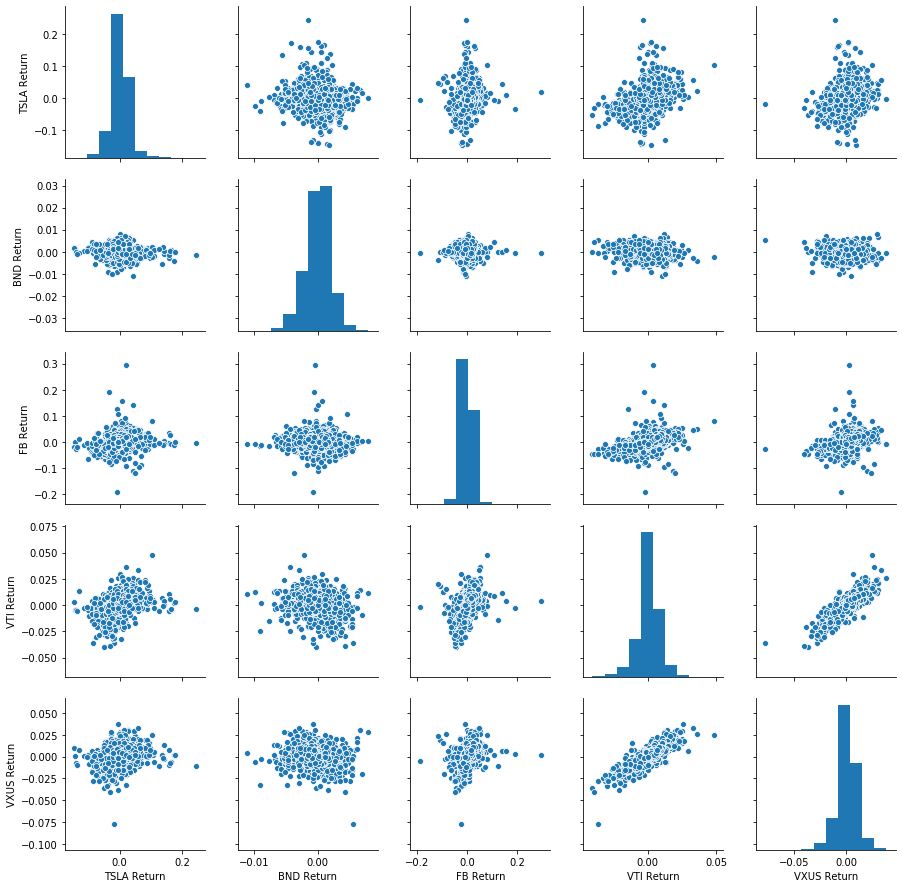

In [106]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

"""
Thoughts about the variables 




"""


In [107]:
# Worst Drop 
returns.idxmin()
# returns.min()

TSLA Return   2013-11-06
BND Return    2013-07-05
FB Return     2018-07-26
VTI Return    2015-08-24
VXUS Return   2016-06-24
dtype: datetime64[ns]

In [108]:
returns.idxmax()


TSLA Return   2013-05-09
BND Return    2013-09-18
FB Return     2013-07-25
VTI Return    2018-12-26
VXUS Return   2012-06-29
dtype: datetime64[ns]

In [109]:
returns.std()

TSLA Return    0.031136
BND Return     0.002063
FB Return      0.022751
VTI Return     0.008242
VXUS Return    0.009066
dtype: float64

In [110]:
returns.loc['2015-01-01':'2015-12-31'].std()

TSLA Return    0.024470
BND Return     0.002395
FB Return      0.016174
VTI Return     0.009654
VXUS Return    0.010589
dtype: float64

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



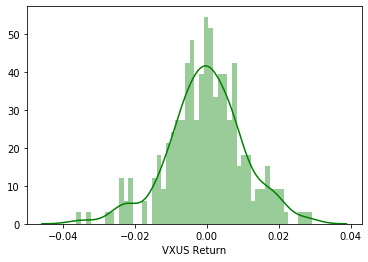

In [111]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['VXUS Return'],color='green',bins=50)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



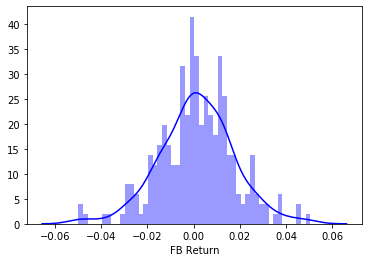

In [112]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['FB Return'],color='blue',bins=50)

In [113]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

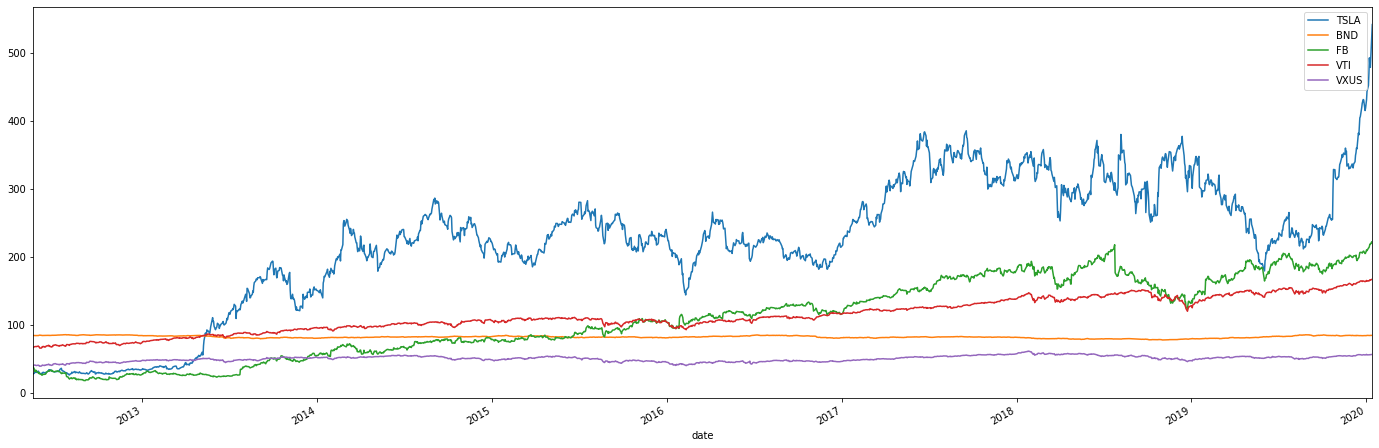

In [114]:
for tick in tickers:
    stock_close[tick].plot(figsize=(24,8),label=tick)
plt.legend()

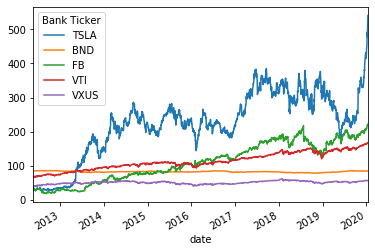

In [115]:
stock_close.plot()

In [116]:
#bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()
AAPL2, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize = 'full')
AAPL2.ix['2014-01-01':'2014-12-31']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,


In [117]:
stock_close

Bank Ticker,TSLA,BND,FB,VTI,VXUS
date,,,,,
2012-05-18,27.56,84.090,38.2318,66.4200,39.96
2012-05-21,28.77,84.100,34.0300,67.6500,40.73
2012-05-22,30.79,83.960,31.0000,67.6700,40.61
2012-05-23,31.02,84.020,32.0000,67.7900,40.29
2012-05-24,30.32,83.930,33.0300,67.9200,40.11
...,...,...,...,...,...
2020-01-08,492.14,83.970,215.2200,164.9100,55.70
2020-01-09,481.34,84.070,218.3000,165.9400,55.95
2020-01-10,478.15,84.210,218.0600,165.4600,55.88
